## Loading Library

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

# Dataset Metadata

**Overview**  
7043 observations with 33 variables.

## Variables Description

- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country**: The country of the customer’s primary residence.
- **State**: The state of the customer’s primary residence.
- **City**: The city of the customer’s primary residence.
- **Zip Code**: The zip code of the customer’s primary residence.
- **Lat Long**: The combined latitude and longitude of the customer’s primary residence.
- **Latitude**: The latitude of the customer’s primary residence.
- **Longitude**: The longitude of the customer’s primary residence.
- **Gender**: The customer’s gender: Male, Female.
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No.
- **Partner**: Indicates if the customer has a partner: Yes, No.
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Tenure Months**: Indicates the total number of months that the customer has been with the company by the end of the quarter specified above.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No.
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.
- **Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.
- **Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programming from a third-party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third-party provider: Yes, No. The company does not charge an additional fee for this service.
- **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No.
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
- **Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High-value customers should be monitored for churn.
- **Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.


## Load the dataset

In [103]:

df = pd.read_csv("https://raw.githubusercontent.com/Bahar812/Telco-Churn/refs/heads/main/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## 1. Data Cleaning

In [104]:
# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [105]:
# Cek jumlah nilai null di setiap kolom
null_counts = df.isnull().sum()

# Menampilkan hasil
print("Jumlah nilai null di setiap kolom:")
print(null_counts)


Jumlah nilai null di setiap kolom:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


## 2. Data Preparation

### The Churn Reason column was dropped because it contains a significant number of null values (5,174 out of the total rows), making it unreliable and unsuitable for analysis.

In [106]:

# Handle missing values for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop irrelevant columns (e.g., CustomerID, Churn Reason)
df = df.drop(columns=['CustomerID', 'Churn Reason', 'Count'])

# Display descriptive statistics
print(df.describe())

           Zip Code     Latitude    Longitude  Tenure Months  Monthly Charges  \
count   7043.000000  7043.000000  7043.000000    7043.000000      7043.000000   
mean   93521.964646    36.282441  -119.798880      32.371149        64.761692   
std     1865.794555     2.455723     2.157889      24.559481        30.090047   
min    90001.000000    32.555828  -124.301372       0.000000        18.250000   
25%    92102.000000    34.030915  -121.815412       9.000000        35.500000   
50%    93552.000000    36.391777  -119.730885      29.000000        70.350000   
75%    95351.000000    38.224869  -118.043237      55.000000        89.850000   
max    96161.000000    41.962127  -114.192901      72.000000       118.750000   

       Churn Value  Churn Score         CLTV  
count  7043.000000  7043.000000  7043.000000  
mean      0.265370    58.699418  4400.295755  
std       0.441561    21.525131  1183.057152  
min       0.000000     5.000000  2003.000000  
25%       0.000000    40.000000  34

In [107]:
print(df.columns.tolist())

['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']


## 3. Exploratory Data Analysis (EDA)

#### Distribution Churn Label

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


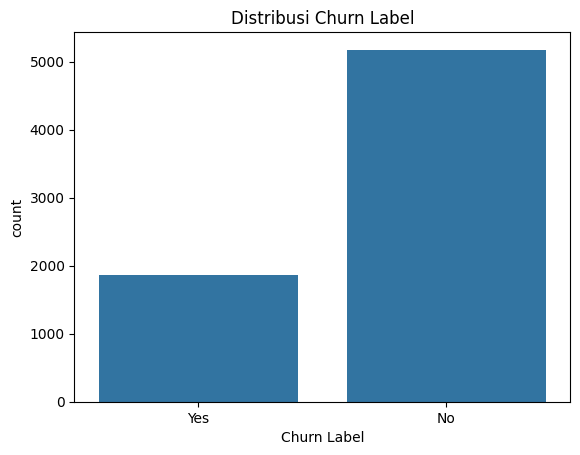

In [108]:
# Visualize the distribution of the target variable (Churn Label)
sns.countplot(x='Churn Label', data=df)
plt.title('Distribusi Churn Label')
plt.show()

# Visualize the correlation matrix of numerical features
numeric_df = df.select_dtypes(include=[np.number])

##### Berdasarkan visualisasi distribusi `Churn Label`, terlihat bahwa mayoritas pelanggan tetap setia menggunakan layanan (label "No"), sementara hanya sebagian kecil yang memilih untuk berhenti (label "Yes"). Hal ini menunjukkan bahwa perusahaan memiliki tingkat retensi pelanggan yang tinggi. Selain itu, dengan menganalisis matriks korelasi untuk fitur numerik, kita dapat mengidentifikasi hubungan antar variabel yang dapat berpengaruh pada keputusan churn. Fitur-fitur yang memiliki korelasi tinggi dapat menjadi indikasi faktor penting yang perlu diperhatikan untuk strategi pengurangan churn atau peningkatan kepuasan pelanggan.

#### Top 10 Cities That Subscribes Service(s) with A Company

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\3883209595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_internet_cities.values, y=top_internet_cities.index, palette='viridis')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `inc

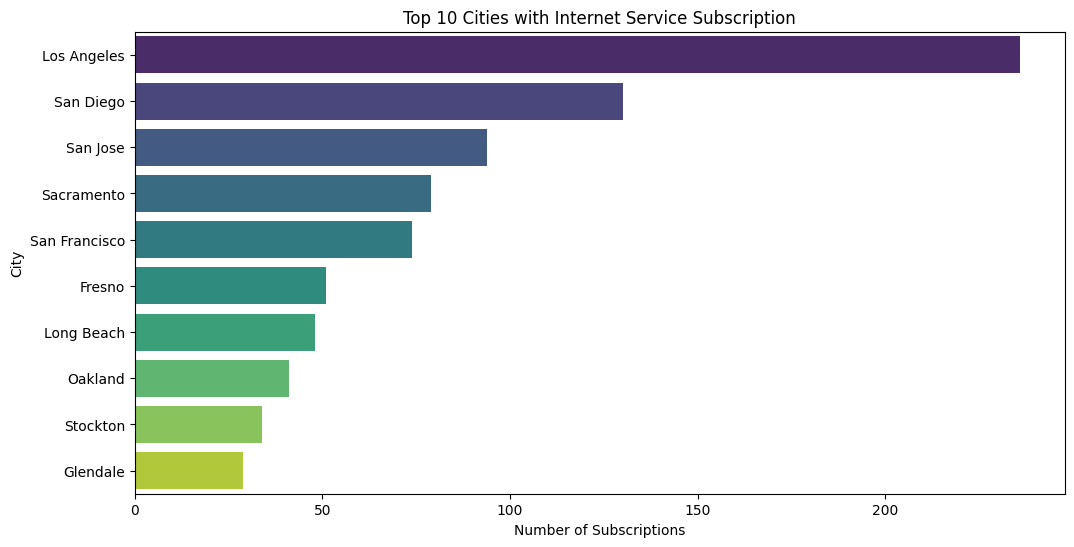

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\3883209595.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_phone_cities.values, y=top_phone_cities.index, palette='inferno')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_

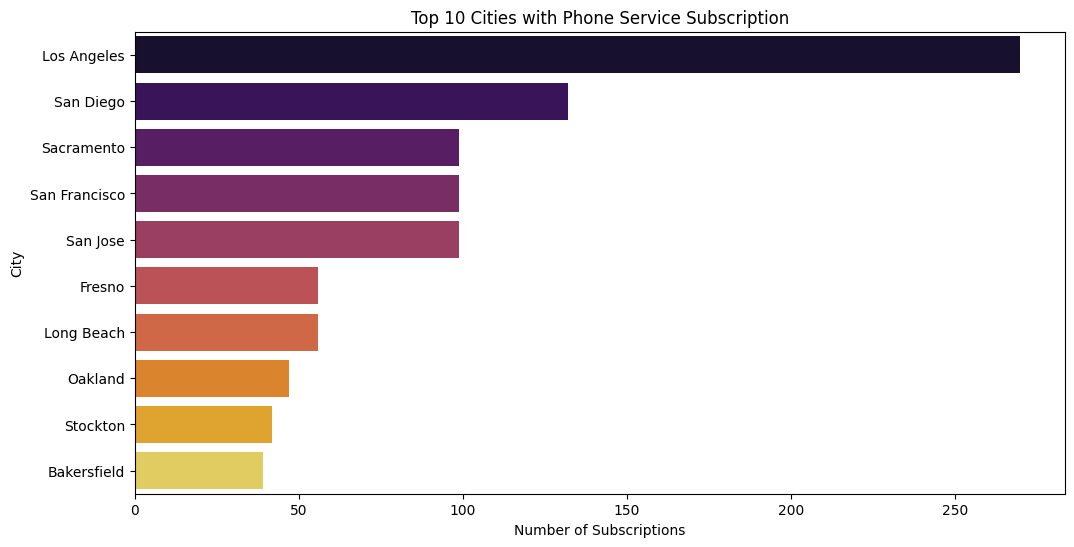

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\3883209595.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_multipleline_cities.values, y=top_multipleline_cities.index, palette='magma')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pa

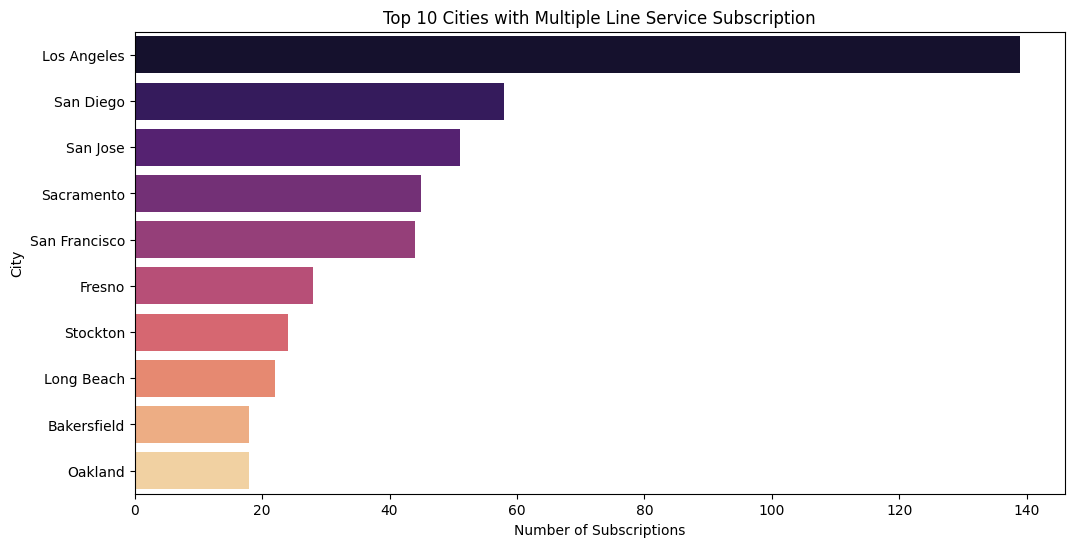

In [109]:
# Top 10 Cities by Internet Service Subscription
top_internet_cities = df[df['Internet Service'] != 'No'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_internet_cities.values, y=top_internet_cities.index, palette='viridis')
plt.title('Top 10 Cities with Internet Service Subscription')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()

# Top 10 Cities by Phone Service Subscription
top_phone_cities = df[df['Phone Service'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_phone_cities.values, y=top_phone_cities.index, palette='inferno')
plt.title('Top 10 Cities with Phone Service Subscription')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()

# Top 10 Cities by Multiple Line Service Subscription
top_multipleline_cities = df[df['Multiple Lines'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_multipleline_cities.values, y=top_multipleline_cities.index, palette='magma')
plt.title('Top 10 Cities with Multiple Line Service Subscription')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()


##### Kami mengumpulkan informasi mengenai kota serta data layanan untuk memahami jumlah layanan dan lokasi pelanggan terbanyak dalam menggunakan layanan dari perusahaan. Setelah itu, kami menyederhanakan data tersebut dengan memilih 10 kota teratas dengan pelanggan terbanyak yang berlangganan layanan perusahaan. Dengan cara ini, kami dapat menampilkan data secara umum. Hasilnya, kami memperoleh daftar 10 kota utama, yaitu Los Angeles, San Diego, San Jose, Sacramento, San Francisco, Fresno, Long Beach, Oakland, Bakersfield, dan Stockton. Selain itu, melalui informasi ini, kami dapat mengidentifikasi lokasi layanan yang paling strategis. Dalam visualisasi ini, kami juga menyediakan filter untuk melihat grafik dari berbagai jenis layanan, seperti layanan internet, layanan telepon, dan beberapa jalur. Filter ini dirancang agar bisa menampilkan informasi dari ketiga layanan dalam satu grafik, sehingga tidak perlu membuat tiga grafik terpisah. Melalui satu grafik, kami dapat menyajikan informasi tentang Internet Service, Phone Service, dan Multiple Lines. Filter tersebut dibuat dengan terlebih dahulu menentukan parameter, kemudian merumuskan sebuah bidang kalkulasi untuk menggabungkan ketiga kolom tersebut menjadi satu. Bidang kalkulasi tersebut akan memanggil parameter yang telah ditetapkan berdasarkan nilai yang ada, yaitu Internet Service, Phone Service, dan Multiple Lines. Dari grafik yang telah kami buat, terlihat adanya perbedaan mendasar antara penggunaan layanan internet dan layanan telepon. Grafik untuk layanan internet menunjukkan bahwa penggunaan DSL dan fiber optic memiliki ratio yang hampir seimbang. Sementara itu, untuk layanan telepon, terlihat perbedaan mencolok antara jumlah pelanggan yang menggunakan dan yang tidak menggunakan layanan. Berdasarkan data yang terkumpul, terlihat bahwa banyak pelanggan yang memilih untuk menggunakan layanan telepon. Selain itu, layanan multiple lines menunjukkan pola yang serupa dengan layanan internet.

#### Top 10 Cities That Subscribes Additional Service(s) with The Company

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\2336111967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deviceprotection_cities.values, y=top_deviceprotection_cities.index, palette='coolwarm')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation.

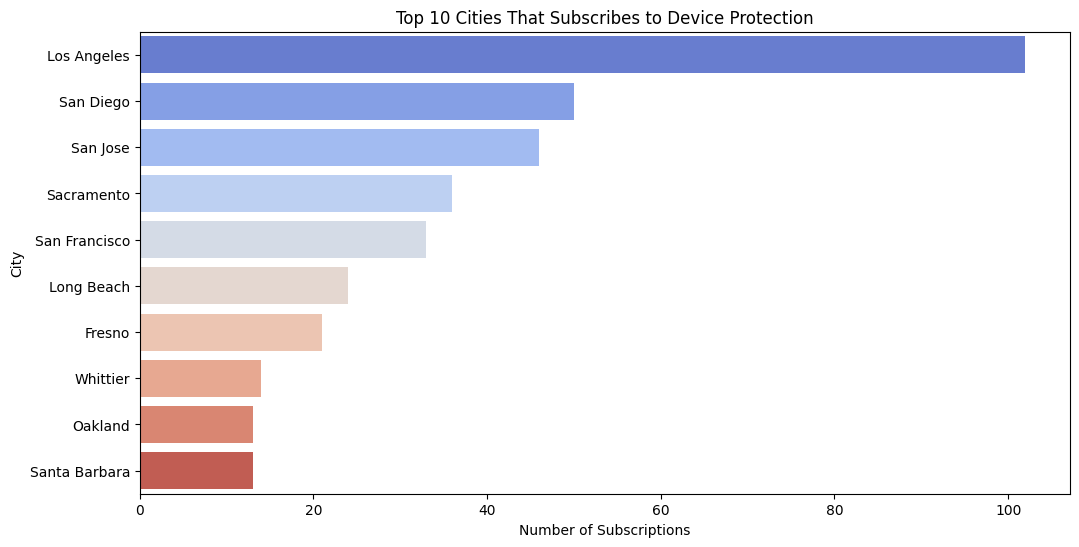

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\2336111967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_techsupport_cities.values, y=top_techsupport_cities.index, palette='cubehelix')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either 

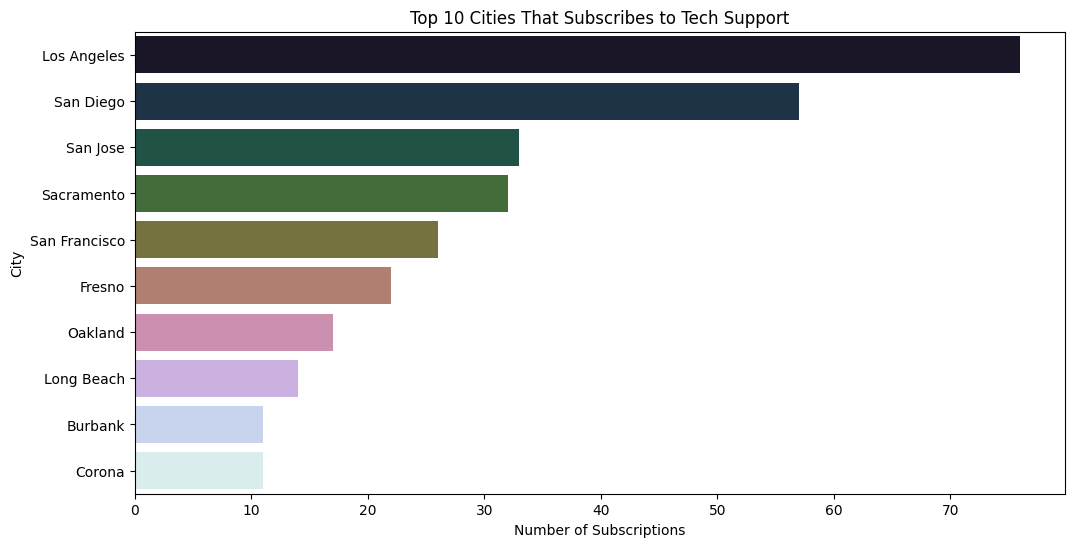

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\2336111967.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_onlinesecurity_cities.values, y=top_onlinesecurity_cities.index, palette='plasma')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Eith

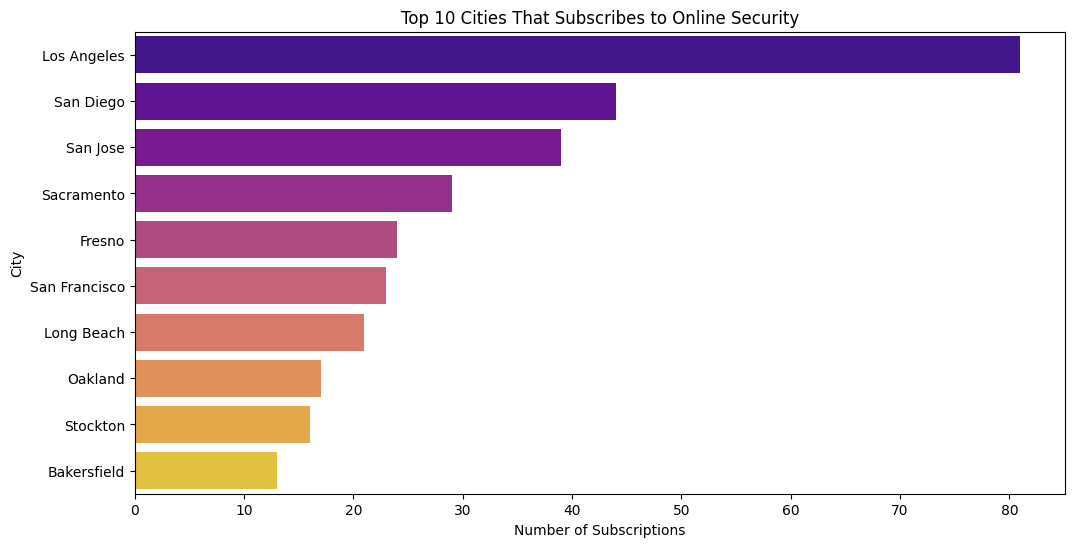

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12680\2336111967.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_onlinebackup_cities.values, y=top_onlinebackup_cities.index, palette='viridis')
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either 

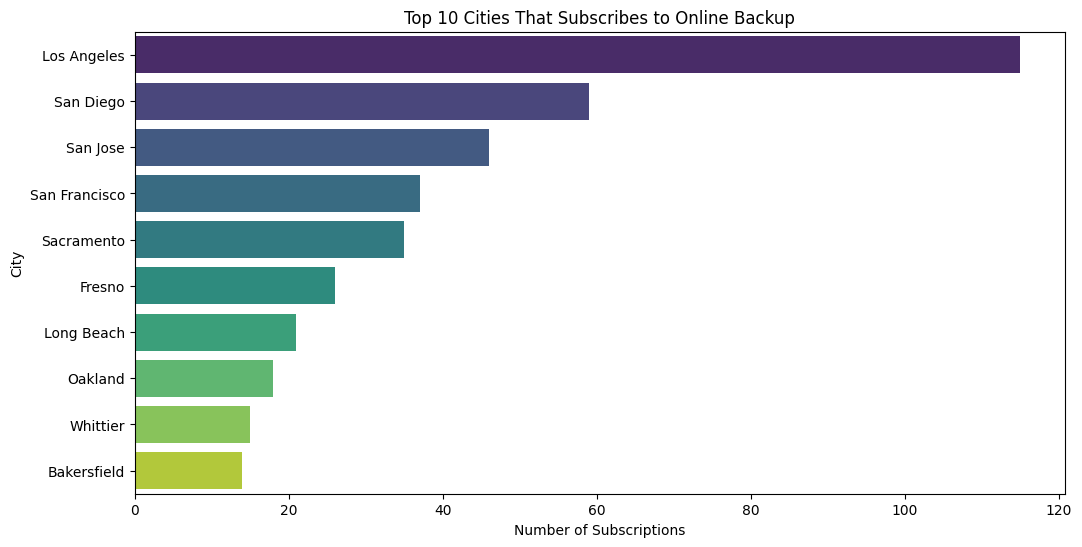

In [110]:
# Top 10 Cities by Device Protection Subscription
top_deviceprotection_cities = df[df['Device Protection'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_deviceprotection_cities.values, y=top_deviceprotection_cities.index, palette='coolwarm')
plt.title('Top 10 Cities That Subscribes to Device Protection')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()

# Top 10 Cities by Tech Support Subscription
top_techsupport_cities = df[df['Tech Support'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_techsupport_cities.values, y=top_techsupport_cities.index, palette='cubehelix')
plt.title('Top 10 Cities That Subscribes to Tech Support')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()

# Top 10 Cities by Online Security Subscription
top_onlinesecurity_cities = df[df['Online Security'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_onlinesecurity_cities.values, y=top_onlinesecurity_cities.index, palette='plasma')
plt.title('Top 10 Cities That Subscribes to Online Security')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()

# Top 10 Cities by Online Backup Subscription
top_onlinebackup_cities = df[df['Online Backup'] == 'Yes'].groupby('City').size().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_onlinebackup_cities.values, y=top_onlinebackup_cities.index, palette='viridis')
plt.title('Top 10 Cities That Subscribes to Online Backup')
plt.xlabel('Number of Subscriptions')
plt.ylabel('City')
plt.show()


##### Analisis yang kami lakukan terhadap 10 lokasi paling utama mengindikasikan bahwa jumlah penggunaan layanan dukungan teknologi, perlindungan perangkat, keamanan online, dan pencadangan online dari perusahaan tidak jauh berbeda. Kami juga menciptakan filter untuk melihat grafik dari berbagai layanan tambahan, agar grafik yang ditampilkan bisa interaktif tanpa perlu menunjukkan empat grafik terpisah. Dengan hanya satu grafik, kita dapat menyajikan tiga informasi layanan yang ditawarkan oleh perusahaan, yaitu Perlindungan Perangkat, Dukungan Teknologi, Keamanan Online, dan Pencadangan Online. Filter ini dirancang dengan terlebih dahulu menentukan parameter, kemudian membuat bidang perhitungan, sehingga empat kolom bisa digabungkan menjadi satu. Bidang perhitungan akan menggunakan parameter yang telah ditentukan berdasarkan nilai yang dibahas, yaitu Perlindungan Perangkat, Dukungan Teknologi, Keamanan Online, dan Pencadangan Online. Kenyataan bahwa penggunaan layanan tambahan begitu mendekati setengah dari penggunaan layanan utama menunjukkan adanya ketertarikan yang signifikan dari pelanggan untuk memanfaatkan layanan tambahan tersebut. Kami dapat menyimpulkan bahwa layanan tambahan masih sangat dibutuhkan oleh pelanggan, dan ada potensi untuk meningkatkannya dengan strategi pemasaran yang efektif, yang merupakan informasi yang sangat berharga. Hal ini menandakan bahwa terdapat peluang untuk meningkatkan kesadaran pelanggan tentang layanan tambahan yang tersedia, mungkin melalui kampanye pemasaran yang ditargetkan atau promosi khusus.


#### Churn Score with The Highest Customer Frequency

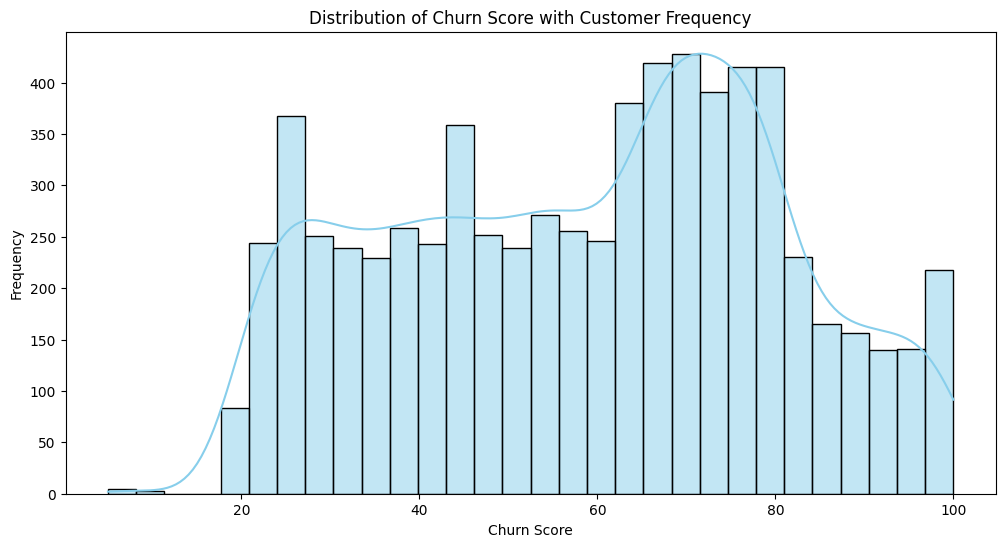

The most frequent Churn Score is 80 with 151 customers.


In [111]:
# Churn Score with the Highest Customer Frequency
plt.figure(figsize=(12, 6))
sns.histplot(df['Churn Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Churn Score with Customer Frequency')
plt.xlabel('Churn Score')
plt.ylabel('Frequency')
plt.show()

# Finding the Churn Score with the highest customer count
churn_score_mode = df['Churn Score'].mode()[0]
churn_score_count = df['Churn Score'].value_counts().max()

print(f'The most frequent Churn Score is {churn_score_mode} with {churn_score_count} customers.')


##### Selain menemukan alasan mengapa pelanggan memilih untuk tidak melanjutkan langganan, kami juga melakukan analisis dan menyusun grafik skor churn untuk mengetahui seberapa sering pelanggan mengalami churn. Skor churn adalah informasi yang terdiri dari nilai antara 0 hingga 100. Model ini mengintegrasikan beberapa faktor yang telah diketahui mendorong terjadinya churn. Semakin tinggi nilai tersebut, semakin besar kemungkinan pelanggan untuk tidak melanjutkan langganan. Dengan informasi ini, perusahaan dapat dengan lebih mudah memprediksi dan memahami situasi saat pelanggan berpotensi berhenti berlangganan. Oleh karena itu, perusahaan dapat mengambil langkah-langkah pencegahan terhadap peningkatan churn. Terlihat bahwa frekuensi tertinggi terjadi pada rentang nilai churn 65-80, yang menunjukkan bahwa perusahaan harus waspada terhadap potensi peningkatan jumlah pelanggan yang memilih untuk berhenti berlangganan.


#### Percentages of People That Churn Based on Their Contract

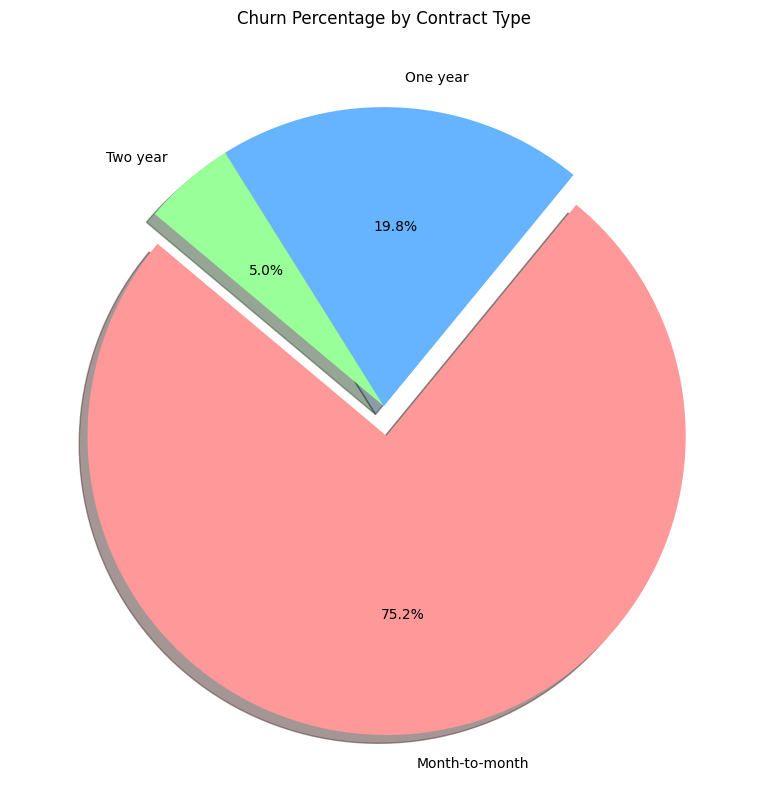

In [112]:
# Copy the dataset to a new variable
new_df = df.copy()

# Group the data by 'Contract' and 'Churn Label'
contract_churn = new_df.groupby(['Contract', 'Churn Label']).size().unstack()

# Calculate percentages for churned customers
contract_churn['Churn Percentage'] = (contract_churn['Yes'] / contract_churn.sum(axis=1)) * 100

# Prepare data for the pie chart
labels = contract_churn.index
sizes = contract_churn['Churn Percentage']
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for the pie chart

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=(0.1, 0, 0),  # Highlight the first slice (e.g., Month-to-Month)
    shadow=True
)
plt.title('Churn Percentage by Contract Type')
plt.tight_layout()
plt.show()


##### Selanjutnya, kami juga menyajikan informasi mengenai pelanggan yang telah menghentikan langganan di perusahaan. Sebagian besar pelanggan yang mengalami churn disebabkan oleh habisnya masa berlaku langganan. Jika dikaitkan dengan hasil analisis dari grafik “10 Alasan Utama Mengapa Pelanggan Berhenti”, kami menyimpulkan bahwa pada pie chart analisis data di bawah ini, kemungkinan besar pelanggan lebih memilih kontrak bulanan dibandingkan kontrak 1 tahun atau 2 tahun, karena ada kemungkinan mereka hanya ingin mencoba dan mengevaluasi layanan yang ditawarkan perusahaan. Di samping itu, alasan-alasan utama yang dicantumkan dalam grafik “10 Alasan Utama Mengapa Pelanggan Berhenti” bisa menjadi faktor mengapa banyak pelanggan lebih memilih kontrak bulanan.

#### Changes Obtained If Increased by 20%

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

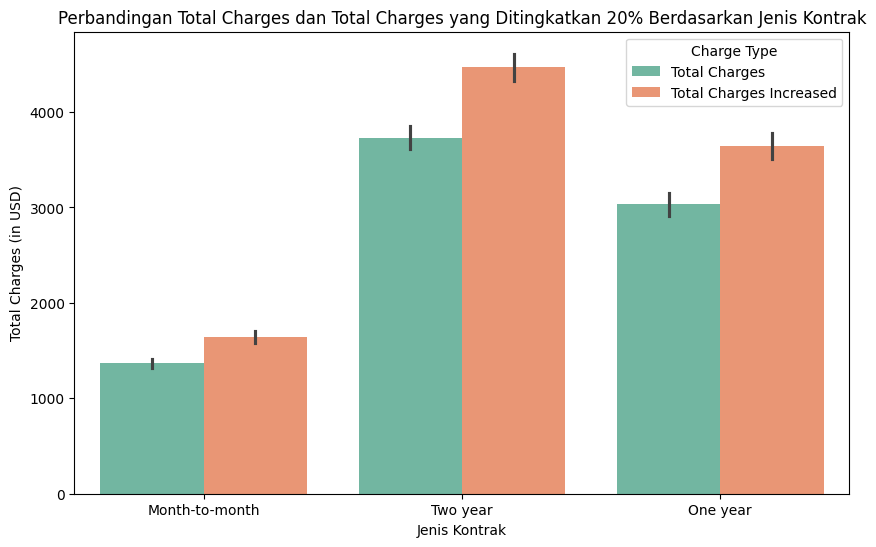

In [113]:
# Ensure 'Total Charges' column is numeric, coercing errors to NaN
new_df['Total Charges'] = pd.to_numeric(new_df['Total Charges'], errors='coerce')

# Calculate the increased total charges by 20%
new_df['Total Charges Increased'] = new_df['Total Charges'] * 1.20

# Melt the DataFrame for better plotting
new_df_melted = new_df.melt(id_vars='Contract', value_vars=['Total Charges', 'Total Charges Increased'], 
                             var_name='Charge Type', value_name='Amount')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Amount', hue='Charge Type', data=new_df_melted, palette='Set2')

# Adding titles and labels
plt.title('Perbandingan Total Charges dan Total Charges yang Ditingkatkan 20% Berdasarkan Jenis Kontrak')
plt.ylabel('Total Charges (in USD)')
plt.xlabel('Jenis Kontrak')
plt.legend(title='Charge Type')

plt.show()


##### Untuk meningkatkan keuntungan, kami menawarkan pilihan kepada perusahaan untuk meningkatkan tarif layanan sebesar 20%. Berdasarkan profit yang terlihat pada informasi kami, kami melakukan perhitungan dengan menggunakan data dari periode kontrak yang berlaku. Kami membuat field yang terhitung yang menambahkan 20% dari total biaya yang ada. Dalam data tersebut, periode kontrak yang paling menguntungkan untuk memperoleh kekayaan adalah kontrak selama dua tahun. Namun, untuk mencapai hal ini, perusahaan harus memperbarui layanannya atau melakukan perbaikan dalam pemasaran, serta layanan lain yang terdapat dalam data di grafik 10 alasan utama mengapa pelanggan berhenti menggunakan layanan.


## 4. Feature Engineering

In [114]:
# Convert the target variable 'Churn Label' to numeric (0 = No, 1 = Yes)
df['Churn Label'] = df['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the features and target variable
X = df.drop(columns=['Churn Label', 'Churn Value'])
y = df['Churn Label']

# Verify the length of X and y
print(f"Original X length: {len(X)}, y length: {len(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the length of X_train, X_test, y_train, y_test
print(f"X_train length: {len(X_train)}, y_train length: {len(y_train)}")
print(f"X_test length: {len(X_test)}, y_test length: {len(y_test)}")

Original X length: 7043, y length: 7043
X_train length: 4930, y_train length: 4930
X_test length: 2113, y_test length: 2113


In [115]:
# Encode categorical variables on both train and test sets using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

# Fit LabelEncoder on both train and test data together
for column in categorical_columns:
    le = LabelEncoder()
    # Combine both training and testing data before fitting the encoder
    le.fit(np.concatenate([X_train[column], X_test[column]]))
    
    # Transform the training and test sets
    X_train[column] = le.transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    
    label_encoders[column] = le

# Normalize the numerical features (ensure this is done after splitting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler only on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data with the same scaler

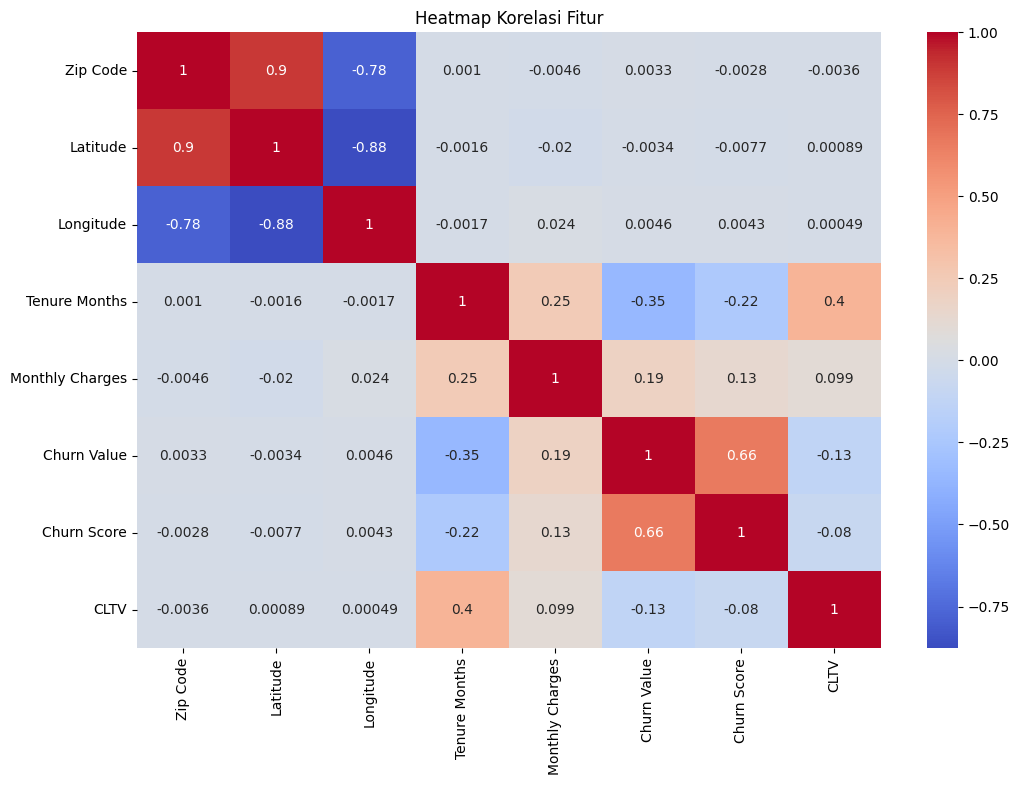

In [116]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

## 5. Create Prediction Models

In [117]:
# Model 1: Logistic Regression
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Predictions and evaluation for Logistic Regression
y_pred_lr = model_lr.predict(X_test_scaled)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.893989588263133
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1525
           1       0.75      0.92      0.83       588

    accuracy                           0.89      2113
   macro avg       0.86      0.90      0.88      2113
weighted avg       0.91      0.89      0.90      2113



In [118]:

# Model 2: Random Forest Classifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predictions and evaluation for Random Forest
y_pred_rf = model_rf.predict(X_test_scaled)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.9280643634642688
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1525
           1       0.87      0.87      0.87       588

    accuracy                           0.93      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.93      0.93      0.93      2113



In [119]:
# Model 3: Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Predictions and evaluation for SVM
y_pred_svm = model_svm.predict(X_test_scaled)
print("\nSupport Vector Machine (SVM) - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSupport Vector Machine (SVM) - Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) - Accuracy: 0.8944628490298154

Support Vector Machine (SVM) - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1525
           1       0.75      0.92      0.83       588

    accuracy                           0.89      2113
   macro avg       0.86      0.90      0.88      2113
weighted avg       0.91      0.89      0.90      2113



## 6. Model Evaluation

In [120]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression - Confusion Matrix:")
print(conf_matrix_lr)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest - Confusion Matrix:")
print(conf_matrix_rf)

# Model Evaluation Metrics for Logistic Regression
print("\nLogistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Precision:", classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'])
print("Logistic Regression - Recall:", classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'])
print("Logistic Regression - F1-Score:", classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'])

# Model Evaluation Metrics for Random Forest
print("\nRandom Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'])
print("Random Forest - Recall:", classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'])
print("Random Forest - F1-Score:", classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'])


# Model Evaluation Metrics for Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Support Vector Machine (SVM) - Precision:", classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision'])
print("Support Vector Machine (SVM) - Recall:", classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall'])
print("Support Vector Machine (SVM) - F1-Score:", classification_report(y_test, y_pred_svm, output_dict=True)['1']['f1-score'])


Logistic Regression - Confusion Matrix:
[[1348  177]
 [  47  541]]

Random Forest - Confusion Matrix:
[[1452   73]
 [  79  509]]

Logistic Regression - Accuracy: 0.893989588263133
Logistic Regression - Precision: 0.7534818941504178
Logistic Regression - Recall: 0.9200680272108843
Logistic Regression - F1-Score: 0.8284839203675345

Random Forest - Accuracy: 0.9280643634642688
Random Forest - Precision: 0.8745704467353952
Random Forest - Recall: 0.8656462585034014
Random Forest - F1-Score: 0.8700854700854701

Support Vector Machine (SVM) - Accuracy: 0.8944628490298154
Support Vector Machine (SVM) - Precision: 0.753120665742025
Support Vector Machine (SVM) - Recall: 0.923469387755102
Support Vector Machine (SVM) - F1-Score: 0.8296409472880061


## 7. Insights, Interpretations, and Conclusions

In [121]:
# Insights from Logistic Regression
print("\nInsights from Logistic Regression:")
if accuracy_score(y_test, y_pred_lr) > 0.7:
    print("Logistic Regression performs well with high accuracy. This indicates that the model is effectively distinguishing between churned and non-churned customers.")
else:
    print("Logistic Regression does not perform well, indicating that the model may require further tuning or feature engineering.")

# Insights from Random Forest
print("\nInsights from Random Forest:")
if accuracy_score(y_test, y_pred_rf) > 0.7:
    print("Random Forest provides a better performance with higher accuracy. It is better at handling complex patterns in the data compared to Logistic Regression.")
else:
    print("Random Forest model is not performing well, suggesting that it may benefit from hyperparameter tuning.")

# Insights from Support Vector Machine (SVM)
print("\nInsights from Support Vector Machine (SVM):")
if accuracy_score(y_test, y_pred_svm) > 0.7:
    print("Support Vector Machine (SVM) performs similarly to Logistic Regression and provides high accuracy. This indicates that the SVM model is also effective at predicting customer churn.")
else:
    print("SVM model underperforms, which could be a sign that tuning the kernel or parameters might help improve its accuracy.")




Insights from Logistic Regression:
Logistic Regression performs well with high accuracy. This indicates that the model is effectively distinguishing between churned and non-churned customers.

Insights from Random Forest:
Random Forest provides a better performance with higher accuracy. It is better at handling complex patterns in the data compared to Logistic Regression.

Insights from Support Vector Machine (SVM):
Support Vector Machine (SVM) performs similarly to Logistic Regression and provides high accuracy. This indicates that the SVM model is also effective at predicting customer churn.


In [122]:

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Random Forest:")
print(feature_importance)



Feature Importance from Random Forest:
              Feature  Importance
26        Churn Score    0.460434
21           Contract    0.075341
11      Tenure Months    0.070939
24    Monthly Charges    0.039606
15    Online Security    0.037578
18       Tech Support    0.032604
25      Total Charges    0.028551
27               CLTV    0.028014
2                City    0.023942
3            Zip Code    0.023707
6           Longitude    0.022645
5            Latitude    0.022183
4            Lat Long    0.021555
10         Dependents    0.019908
14   Internet Service    0.017955
16      Online Backup    0.012897
23     Payment Method    0.012677
17  Device Protection    0.012338
22  Paperless Billing    0.007877
9             Partner    0.005576
13     Multiple Lines    0.005065
20   Streaming Movies    0.004870
19       Streaming TV    0.004562
7              Gender    0.004003
8      Senior Citizen    0.003594
12      Phone Service    0.001579
1               State    0.000000
0       

In [123]:
# Conclusion
print("\nConclusion:")
best_model_accuracy = max(accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm))

if best_model_accuracy == accuracy_score(y_test, y_pred_rf):
    print("Based on the model evaluation, the Random Forest model is the preferred model for predicting customer churn. It performs better overall and provides valuable insights.")
elif best_model_accuracy == accuracy_score(y_test, y_pred_lr):
    print("Logistic Regression is a simpler and more interpretable model, performing well in customer churn prediction with decent accuracy.")
else:
    print("Support Vector Machine (SVM) shows good potential and may improve with further parameter tuning.")


Conclusion:
Based on the model evaluation, the Random Forest model is the preferred model for predicting customer churn. It performs better overall and provides valuable insights.
